# Run with Top2Vec with 5k since '08 twitter data :)

## Copy Ellis's new pre-processing function

In [1]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import string
string.punctuation 
print (string.punctuation) 
stop_words = stopwords.words('english')
# -*- coding: utf-8 -*-
punctuation = [ c for c in string.punctuation ] + [u'\u201c',u'\u201d',u'\u2018',u'\u2019']
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ewanevans/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [2]:
punctuation

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '“',
 '”',
 '‘',
 '’']

In [3]:
!ls

10k_unfiltered.csv
2k_general.csv
5k_2008.csv
Ewan_first_twitter_top2vec.ipynb
Ewan_top2vec_test.ipynb
Jenna_2k_tweets.ipynb
training.1600000.processed.noemoticon.csv


In [4]:
data = pd.read_csv('5k_2008.csv')

In [5]:
data.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count
0,0,2022-06-08 04:20:19+00:00,1534389836995514368,First monkeypox patient to go public is a gay ...,MailOnline,13.0
1,1,2022-05-21 13:50:18+00:00,1528010297482657793,Father-of-two leaves wife for Ukrainian refuge...,Daily_Express,1.0
2,2,2022-05-09 09:10:02+00:00,1523591110798548992,Victorious Sinn Fein raises pressure for a bor...,DailyMailUK,2.0
3,3,2022-04-27 13:53:41+00:00,1519313837878652929,Boris is ONLY PM because Britain voted Brexit'...,Daily_Express,4.0
4,4,2022-04-19 22:10:00+00:00,1516539637761814533,Moment Putin’s nuclear bomber flies close to U...,TheSun,23.0


In [6]:
df_copy = data.copy()

Add tailored stopwords

In [7]:
len(stop_words)

179

In [31]:
list_of_xtra_stop_words = ['Djokovic', 'http', 'eu', 'us', 'migrant', 'migrants', 'migrates', 'foreign', 'foreigner', 'foreigners', 'immigration', 'immigrant', 'asylum', 'refugee', 'refugees', 'visa', 'visas', 'borders', 'border', 'deport', 'deportation', 'deports', 'uk', 'co']
len(list_of_xtra_stop_words)

24

In [32]:
stop_words = stopwords.words('english')
stop_words.extend(list_of_xtra_stop_words)

In [33]:
len(stop_words)

203

In [11]:
#remove_punc("This is a test of the remove 99.99% functions")

In [12]:
import re
def remove_punc(text):
    txt=text
    for punc in punctuation:
        txt = txt.replace(punc, " ")
    txt = txt.lower()
    return txt 

def remove_URL_and_HTML(row):
    row = re.sub(r'https.*$', "", row)
    return row

def remove_stopwords(row):
    row = word_tokenize(row)
    return ' '.join(w for w in row if not w in stop_words)

def preprocessing(col):
    col = col.astype(str)
    punctuation_list = col.apply(remove_punc)
    URL = punctuation_list.apply(remove_URL_and_HTML)
    word_tokens = URL.apply(remove_stopwords)                                           
    return word_tokens

In [13]:
df_copy.shape

(6065, 6)

In [14]:
df_copy["Text"][0]

"First monkeypox patient to go public is a gay HR manager from London who was deported from Dubai just weeks ago for testing positive for HIV - and he claims he STILL hasn't been contact traced https://t.co/OZDkG9qduo"

In [35]:
df_copy['preprocessed'] = preprocessing(df_copy["Text"])

In [36]:
df_copy.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Like Count,preprocessed
0,0,2022-06-08 04:20:19+00:00,1534389836995514368,First monkeypox patient to go public is a gay ...,MailOnline,13.0,first monkeypox patient go public gay hr manag...
1,1,2022-05-21 13:50:18+00:00,1528010297482657793,Father-of-two leaves wife for Ukrainian refuge...,Daily_Express,1.0,father two leaves wife ukrainian moved family ...
2,2,2022-05-09 09:10:02+00:00,1523591110798548992,Victorious Sinn Fein raises pressure for a bor...,DailyMailUK,2.0,victorious sinn fein raises pressure poll
3,3,2022-04-27 13:53:41+00:00,1519313837878652929,Boris is ONLY PM because Britain voted Brexit'...,Daily_Express,4.0,boris pm britain voted brexit nigel farage sla...
4,4,2022-04-19 22:10:00+00:00,1516539637761814533,Moment Putin’s nuclear bomber flies close to U...,TheSun,23.0,moment putin nuclear bomber flies close ukrain...


In [37]:
df_copy.shape

(6065, 7)

In [38]:
df_copy["Tweet Id"].nunique()

6037

In [39]:
df_copy_no_duplicates = df_copy.drop_duplicates(subset='Tweet Id', keep="first")

In [40]:
df_copy_no_duplicates.shape

(6037, 7)

In [41]:
df_copy_no_duplicates = df_copy.drop_duplicates(subset='preprocessed', keep="first")

In [42]:
df_copy_no_duplicates.shape

(5433, 7)

# Practice run with Top2Vec model

In [43]:
from top2vec import Top2Vec

In [44]:
list_tweets = [i for i in df_copy_no_duplicates['preprocessed']]

Number of tweets in list

In [45]:
len(list_tweets)

5433

In [46]:
tweet_lengths = [len(i.split(" ")) for i in list_tweets]

In [47]:
tweet_lengths

[20,
 10,
 6,
 9,
 10,
 10,
 9,
 10,
 5,
 10,
 10,
 7,
 10,
 7,
 8,
 7,
 8,
 6,
 10,
 7,
 6,
 8,
 10,
 8,
 9,
 7,
 4,
 9,
 6,
 11,
 10,
 12,
 13,
 11,
 8,
 9,
 13,
 12,
 11,
 6,
 12,
 15,
 10,
 9,
 12,
 9,
 10,
 10,
 12,
 7,
 8,
 8,
 7,
 9,
 8,
 7,
 7,
 9,
 8,
 10,
 6,
 6,
 11,
 5,
 9,
 10,
 6,
 10,
 12,
 10,
 15,
 7,
 9,
 10,
 8,
 10,
 13,
 6,
 12,
 9,
 8,
 9,
 10,
 9,
 6,
 11,
 9,
 11,
 9,
 10,
 6,
 7,
 11,
 9,
 19,
 6,
 7,
 11,
 8,
 13,
 8,
 8,
 11,
 12,
 6,
 9,
 19,
 9,
 13,
 11,
 10,
 7,
 9,
 9,
 10,
 7,
 8,
 8,
 7,
 13,
 11,
 16,
 8,
 10,
 9,
 7,
 8,
 11,
 6,
 19,
 10,
 20,
 10,
 10,
 8,
 11,
 10,
 9,
 10,
 10,
 9,
 10,
 15,
 6,
 6,
 8,
 7,
 11,
 10,
 14,
 10,
 8,
 8,
 9,
 9,
 6,
 11,
 7,
 7,
 7,
 9,
 9,
 14,
 10,
 6,
 10,
 19,
 22,
 9,
 7,
 12,
 11,
 9,
 12,
 10,
 12,
 5,
 10,
 9,
 7,
 13,
 7,
 10,
 9,
 9,
 5,
 9,
 7,
 6,
 11,
 14,
 20,
 10,
 11,
 8,
 6,
 12,
 8,
 7,
 8,
 9,
 11,
 8,
 9,
 8,
 9,
 11,
 8,
 14,
 5,
 8,
 8,
 7,
 5,
 9,
 8,
 8,
 8,
 11,
 11,
 9,
 11,
 8,
 3,
 8,
 14

In [48]:
len(tweet_lengths)

5433

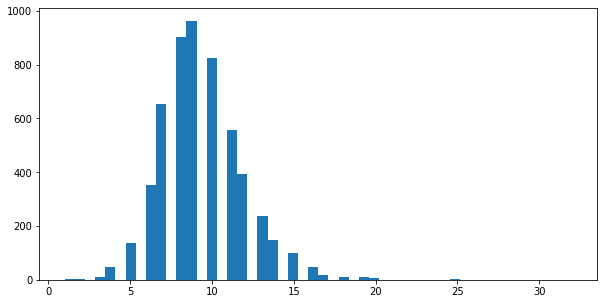

In [49]:
plt.figure(figsize=(10,5))
plt.hist(tweet_lengths, bins=50);

Training our model - default embedding model is doc2vec 

In [57]:
model_5k = Top2Vec(list_tweets, workers=-2, speed='deep-learn', min_count=100)

2022-06-08 17:53:23,529 - top2vec - INFO - Pre-processing documents for training
2022-06-08 17:53:23,679 - top2vec - INFO - Creating joint document/word embedding
2022-06-08 17:53:24,972 - top2vec - INFO - Creating lower dimension embedding of documents
2022-06-08 17:53:33,760 - top2vec - INFO - Finding dense areas of documents
2022-06-08 17:53:34,120 - top2vec - INFO - Finding topics


Number of topics produced by top2vec model

In [58]:
model_5k.get_num_topics()

20

50 key words associated with topic 0

In [59]:
model_5k.topic_words[0]

array(['get', 'ukraine', 'syrian', 'police', 'thousands', 'seeker',
       'people', 'british', 'year', 'trump', 'europe', 'warns', 'home',
       'new', 'calais', 'camp', 'deal', 'crisis', 'immigrants', 'seekers',
       'could', 'stop', 'illegal', 'german', 'two', 'years', 'boat',
       'deported', 'bit', 'may', 'germany', 'says', 'million', 'france',
       'take', 'merkel', 'ukrainian', 'ly', 'brexit', 'back', 'britain',
       'migration', 'channel'], dtype='<U10')

In [60]:
model_5k.topic_words[1]

array(['ukrainian', 'back', 'could', 'new', 'ly', 'may', 'police',
       'britain', 'says', 'calais', 'camp', 'year', 'deported', 'people',
       'two', 'migration', 'stop', 'europe', 'thousands', 'seekers',
       'channel', 'immigrants', 'boat', 'years', 'seeker', 'take',
       'syrian', 'german', 'germany', 'home', 'ukraine', 'merkel', 'get',
       'crisis', 'million', 'bit', 'illegal', 'warns', 'brexit',
       'british', 'france', 'trump', 'deal'], dtype='<U10')

In [61]:
model_5k.topic_words[3]

array(['ukrainian', 'take', 'illegal', 'camp', 'trump', 'may', 'back',
       'deal', 'calais', 'germany', 'merkel', 'could', 'britain', 'stop',
       'people', 'says', 'ly', 'two', 'get', 'british', 'syrian',
       'german', 'years', 'deported', 'brexit', 'france', 'million',
       'crisis', 'seeker', 'migration', 'new', 'police', 'immigrants',
       'boat', 'home', 'year', 'bit', 'warns', 'europe', 'ukraine',
       'thousands', 'channel', 'seekers'], dtype='<U10')

In [62]:
model_5k.topic_words[4]

array(['trump', 'people', 'german', 'police', 'syrian', 'seeker', 'camp',
       'new', 'illegal', 'deal', 'ukrainian', 'france', 'year', 'channel',
       'migration', 'home', 'british', 'bit', 'million', 'thousands',
       'ly', 'get', 'stop', 'says', 'europe', 'britain', 'immigrants',
       'take', 'years', 'crisis', 'boat', 'seekers', 'ukraine', 'may',
       'two', 'germany', 'calais', 'deported', 'back', 'merkel', 'warns',
       'could', 'brexit'], dtype='<U10')

In [56]:
model_5k.topic_words[5]

array(['britain'], dtype='<U7')

Find 3 topics associated with "Ukraine" and show us the 50 words in those topics

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model_5k.search_topics(keywords=["Ukraine"], num_topics=3)

In [ ]:
topic_words

Find 5 documents (tweets) belonging to topic 1 

In [ ]:
model_5k.search_documents_by_topic(1, num_docs=10)

In [ ]:
model_5k.search_documents_by_topic(2, num_docs=10)

In [ ]:
model_5k.search_documents_by_topic(2, num_docs=5)

In [ ]:
model_5k.search_documents_by_topic(9, num_docs=5)

Reduce the number of topics from 23 to 10

In [ ]:
topic_mapping = model_5k.hierarchical_topic_reduction(num_topics=10)

Original topics 'condensed' into new topic number 1

In [ ]:
topic_mapping[1]

In [ ]:
model_5k.topic_words_reduced[0]

In [ ]:
model_5k.topic_words_reduced[1]

In [ ]:
model_5k.topic_words_reduced[2]

In [ ]:
model_5k.generate_topic_wordcloud(0)

## Unfiltered top2vec model - 10k tweets

In [ ]:
!ls

In [ ]:
nofilter_df = pd.read_csv('10k_unfiltered.csv')

In [ ]:
nofilter_df.head()